# EFFICIENCY LIMITS

In [93]:
%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


After some DCDC efficiency measurements we can have some test points below:

In [94]:
test_power_level = np.array([5, 10, 20, 30, 50, 75, 100])  # % of rated output power
test_eff_level = np.array([0.7, 0.89, 0.91, 0.93, 0.94, 0.95, 0.90])  # Efficiencies as decimals

We can see that the efficiency is not constant and it depends on the load current. The efficiency is higher at the maximum load current and lower at the minimum load current. With the current data we can check if the DCDC is passing the efficiency limits of 80+ standard.

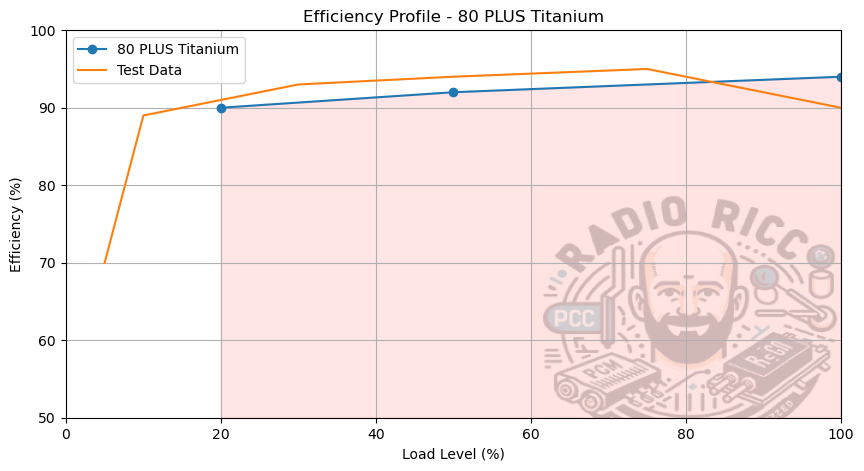

In [ ]:
from efficiency.utils import EightyPlusTitanium

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
EightyPlusTitanium().plot_efficiency(fig, ax)
plt.plot(test_power_level, test_eff_level*100, label="Test Data")
ax.legend()
plt.show()


Unfotunately the DCDC is **NOT** fullfulling **80 PLUS Titanium**. Let's check if it is fullfullling other 80 PLUS standards.

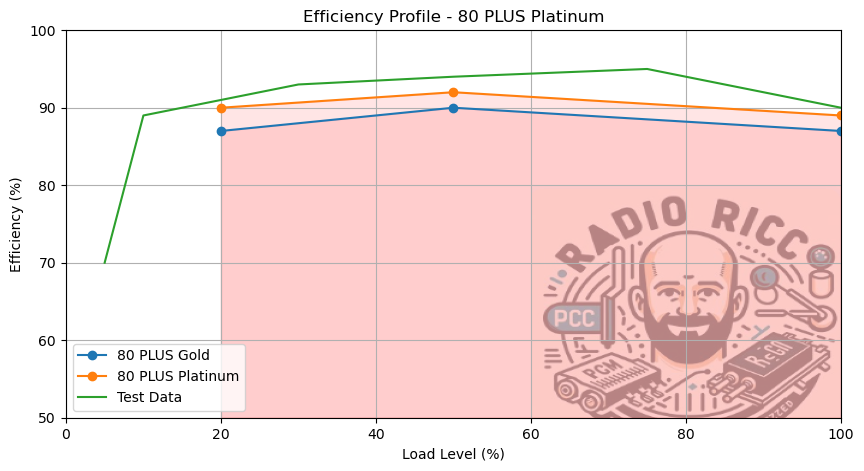

In [96]:
from efficiency.utils import EightyPlusStandard, EightyPlusGold, EightyPlusPlatinum

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
EightyPlusGold().plot_efficiency(fig, ax)
EightyPlusPlatinum().plot_efficiency(fig, ax)

plt.plot(test_power_level, test_eff_level*100, label="Test Data")
ax.legend()

# plt.savefig(self.name + ".png")
plt.show()

# WEIGHTED EFFICIENCY

If the same efficiency profile is analyzed as ACDC converter, we can calculate the weighted efficiency. The weighted efficiency is calculated as:
- CEC Efficiency for California Energy Commission >> 94%
- EU Efficiency for European Union Code of Conduct >> 92%

CEC Weighted Efficiency: 93.86%


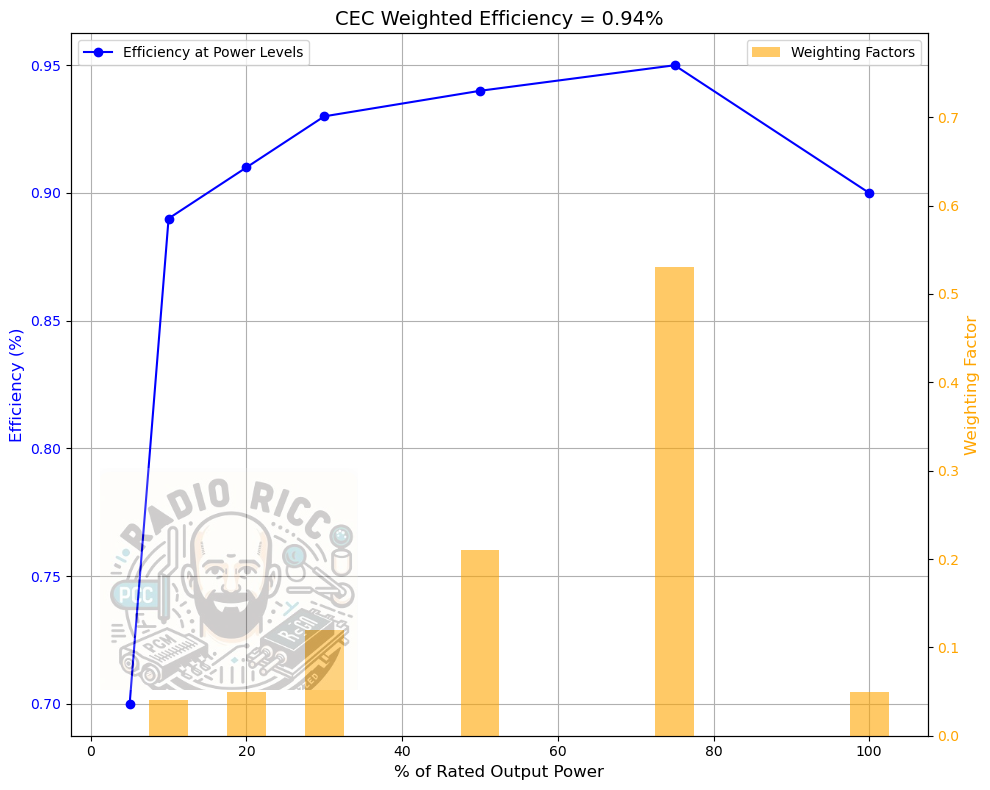

In [97]:
from efficiency.utils import WeightedEfficiency, SolarCECweightedEfficiency, SolarEUweightedEfficiency


cec_efficiency = SolarCECweightedEfficiency()

# Calculate weighted efficiency
weighted_eff = cec_efficiency.calculate_weighted_efficiency(power_levels_inputs=test_power_level, \
                                                            efficiencies_inputs=test_eff_level)
print(f"CEC Weighted Efficiency: {weighted_eff * 100:.2f}%")

# Plot the efficiency curve
cec_efficiency.plot_efficiency()

CEC Weighted Efficiency: 91.69%


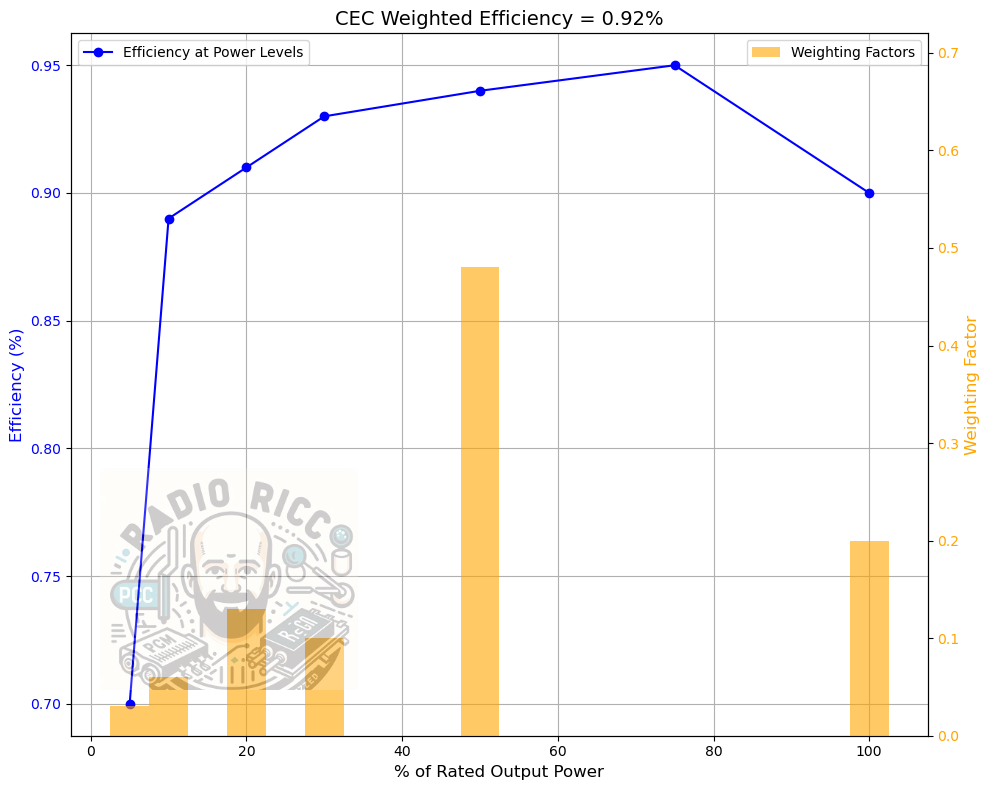

In [98]:
from efficiency.utils import WeightedEfficiency, SolarCECweightedEfficiency, SolarEUweightedEfficiency


cec_efficiency = SolarEUweightedEfficiency()

# Calculate weighted efficiency
weighted_eff = cec_efficiency.calculate_weighted_efficiency(power_levels_inputs=test_power_level, \
                                                            efficiencies_inputs=test_eff_level)
print(f"CEC Weighted Efficiency: {weighted_eff * 100:.2f}%")

# Plot the efficiency curve
cec_efficiency.plot_efficiency()
